<a href="https://colab.research.google.com/github/jay10440/statistical-analysis/blob/main/Markov_Chain_Giggles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definition

Say we have states (typically represented in terms of lists or vectors) of data and want to know how it changes over a parameter based on historical data. One day to do this is via Markov chains.

Simplistic Version: Suppose $v_i$ is a state of measurements (with the usual stochastic assumptions, etc) and $P$ is a transition matrix, meaning it is a stochastic matrix with relevant probabilities as its entries. Then to obtain state $v_{i+1}$, we apply the following process:

$v_{i+1} = P v_i$

The imporant feature to note is that this is a "memoryless system". This means that to get to the next state, we do not require knowledge from any other states than the previous one. For example, $v_4 = P v_3$, $v_{16} = Pv_{15}$ etc.

Mathematically:

$P\{v_{n+1}=j|v_n=i, v_{n-1}=i_{n-1},...,v_1=i_1, v_0=i_0\}=P_{ij}$ where $P_{ij}$ is the transition probabilities described above.

Naturally, we would want to know the chance a state might be in if we start in one state, based off of previous conditions we've observed in data. First, we'll go over useful packages, then we'll consider a couple of basic examples.

#Useful Packages

In [ ]:
install.packages("markovchain")
library(markovchain)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘expm’, ‘RcppParallel’, ‘RcppArmadillo’


Package:  markovchain
Version:  0.9.5
Date:     2023-09-24 09:20:02 UTC
BugReport: https://github.com/spedygiorgio/markovchain/issues




# An Example

In [ ]:
#Let's start by defining the states into a vector:
DriverZone<- c("North", "South","West")
DriverZone #Checking

[1] "North" "South" "West"

Here's the transition matrix we're working with in our example:


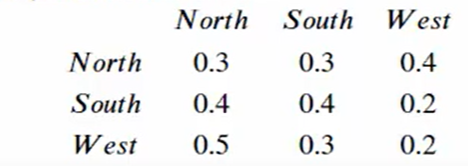


In [ ]:
#Defining the transition matrix:
ZoneTransition<- matrix(c(0.3, 0.3, 0.4, 0.4, 0.4, 0.2, 0.5, 0.3, 0.2), nrow=3, byrow=TRUE,dimname= list(DriverZone, DriverZone))
ZoneTransition #Checking so that the rows add up to the value of 1.

,North,South,West
North,0.3,0.3,0.4
South,0.4,0.4,0.2
West,0.5,0.3,0.2


We now want to run the markov chain model: $v_{i+1}=Pv_i$

In [ ]:
#Markov Chain:
MCZone<- new("markovchain", states=DriverZone, byrow=TRUE, transitionMatrix=ZoneTransition, name="DriverMovement")
MCZone #Checking the process:
class(MCZone)

DriverMovement 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 North, South, West 
 The transition matrix  (by rows)  is defined as follows: 
      North South West
North   0.3   0.3  0.4
South   0.4   0.4  0.2
West    0.5   0.3  0.2


[1] "markovchain"
attr(,"package")
[1] "markovchain"

In [ ]:
#One property of Markov Chains we'd like to know is if it comes out to be steady state. Let's find out!
MCZone^2
MCZone^9
steadyStates(MCZone)

DriverMovement^2 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 North, South, West 
 The transition matrix  (by rows)  is defined as follows: 
      North South West
North  0.41  0.33 0.26
South  0.38  0.34 0.28
West   0.37  0.33 0.30


DriverMovement^9 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 North, South, West 
 The transition matrix  (by rows)  is defined as follows: 
          North     South      West
North 0.3888886 0.3333333 0.2777780
South 0.3888890 0.3333333 0.2777777
West  0.3888891 0.3333333 0.2777775


North,South,West
0.3888889,0.3333333,0.2777778


#Another Example

This methodology is illustrative enough to where we can get a practice data set from GPT, for example, and run a markov chain to see what kinds of transitions we can get.

In [ ]:
#Dataset from GPT:
weather_data <- c("Sunny", "Sunny", "Cloudy", "Rainy", "Sunny", "Cloudy",
                  "Sunny", "Sunny", "Cloudy", "Cloudy", "Rainy", "Rainy",
                  "Sunny", "Sunny", "Rainy", "Cloudy", "Sunny", "Sunny",
                  "Cloudy", "Rainy", "Cloudy", "Sunny", "Cloudy", "Rainy",
                  "Sunny", "Rainy", "Sunny", "Sunny", "Cloudy", "Rainy")
#Define our vector.
current_state<- c("Sunny","Cloudy","Rainy")
current_state
#Creating our transition matrix (after the long and arduous process).
weather_transition<-matrix(c(.38, .46, .16, .33, .12, .55, .57, .29, .14), nrow=3, byrow=TRUE, dimname=list(current_state, current_state))
weather_transition
MCWT<-new("markovchain", states=current_state, byrow=TRUE, transitionMatrix=weather_transition, name="Weather Pattern")
MCWT

[1] "Sunny"  "Cloudy" "Rainy"

,Sunny,Cloudy,Rainy
Sunny,0.38,0.46,0.16
Cloudy,0.33,0.12,0.55
Rainy,0.57,0.29,0.14


Weather Pattern 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 Sunny, Cloudy, Rainy 
 The transition matrix  (by rows)  is defined as follows: 
       Sunny Cloudy Rainy
Sunny   0.38   0.46  0.16
Cloudy  0.33   0.12  0.55
Rainy   0.57   0.29  0.14


In [ ]:
#Determining Patterns:
MCWT^9
steadyStates(MCWT)

Weather Pattern^9 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 Sunny, Cloudy, Rainy 
 The transition matrix  (by rows)  is defined as follows: 
           Sunny    Cloudy     Rainy
Sunny  0.4167901 0.3084265 0.2747834
Cloudy 0.4167837 0.3084185 0.2747978
Rainy  0.4167925 0.3084202 0.2747873


Sunny,Cloudy,Rainy
0.4167888,0.3084223,0.2747889


In [ ]:
random_state_sunny<- c(1,0,0)
nine_step_markov<-MCWT@transitionMatrix
random_state_sunny
nine_step_markov
nine_step_markov^2 %*% random_state_sunny

[1] 1 0 0

,Sunny,Cloudy,Rainy
Sunny,0.38,0.46,0.16
Cloudy,0.33,0.12,0.55
Rainy,0.57,0.29,0.14


Sunny,0.1444
Cloudy,0.1089
Rainy,0.3249


# References

1. An Introduction to Algebraic Statistics with Tensors, Bocci, Chiantini
2. A First Course in Probability 9th Edition, Ross
